In [18]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [19]:
begin, end = 6, 61 # (begin is inclusive, end is exclusive)
count_samples = {
    "active": 16,
    "meditate": 15,
    "neutral": 15
}

In [47]:
class Sample:
    def __init__(self):
        self.data = {
            'RawEEG': [],
            'Alpha': [],
            'Low Beta': [],
            'High Beta': [],
            'Gamma': [],
            'Theta': [],
            'Delta': [],
            'Meditation': [],
            'Attention': []
        }

    def recordDataPoint(self, RawEEG, Attention, Meditation, Alpha, Delta, Theta, LowBeta, HighBeta, Gamma):
        self.data['RawEEG'].append(float(RawEEG))
        self.data['Attention'].append(float(Attention))
        self.data['Meditation'].append(float(Meditation))
        self.data['Alpha'].append(float(Alpha))
        self.data['Delta'].append(float(Delta))
        self.data['Theta'].append(float(Theta))
        self.data['Low Beta'].append(float(LowBeta))
        self.data['High Beta'].append(float(HighBeta))
        self.data['Gamma'].append(float(Gamma))

    '''
    Record a line of data from the CSV output, which takes form RawEEG, Alpha, Delta, Gamma, Low Beta, High Beta, Theta, Attention, Meditation

    '''
    def recordDataLine(self, line):
        self.recordDataPoint(line[0], line[7], line[8], line[1], line[2], line[6], line[4], line[5], line[3])
    
    def getEEG(self):
        return self.data['RawEEG']
    
    def getAttention(self):
        return self.data["Attention"]
    
    def getMeditation(self):
        return self.data["Meditation"]
    
    def getAlpha(self):
        return self.data["Alpha"]
    
    def getDelta(self):
        return self.data["Delta"]
    
    def getTheta(self):
        return self.data["Theta"]
    
    def getLowBeta(self):
        return self.data["Low Beta"]
    
    def getHighBeta(self):
        return self.data["High Beta"]
    
    def getGamma(self):
        return self.data["Gamma"]

    def get(self, key):
        return self.data[key]

    '''
    Scales the data by standard deviation of the EEG data
    '''
    def scale(self):
        eeg_std_dev = np.std(self.data['RawEEG'])

        self.data['Alpha'] = [x / eeg_std_dev for x in self.data['Alpha']]
        self.data['Delta'] = [x / eeg_std_dev for x in self.data['Delta']]
        self.data['Theta'] = [x / eeg_std_dev for x in self.data['Theta']]
        self.data['Low Beta'] = [x / eeg_std_dev for x in self.data['Low Beta']]
        self.data['High Beta'] = [x / eeg_std_dev for x in self.data['High Beta']]
        self.data['Gamma'] = [x / eeg_std_dev for x in self.data['Gamma']]

In [21]:
data = []
dataLabels = []

def transcribeFileToSample(sampleN: int, state: str):
    sample_data = Sample()

    with open("raw_data/" + state + str(sampleN) + ".csv") as f:
        reader = csv.reader(f)

        header = next(reader)
        
        for row in reader:
            sample_data.recordDataLine(row)

        for key in sample_data.data:
            sample_data.data[key] = sample_data.data[key][begin:end]

        sample_data.scale()

        data.append(sample_data)
        dataLabels.append(state)

for state in count_samples:
    for i in range(count_samples[state]):
        transcribeFileToSample(i + 1, state)

In [57]:
def plotCorrelation(feature1: list, feature2: list):
    plt.scatter(feature1, feature2)
    plt.show()
    plt.clf()

    return pearsonr(feature1, feature2)

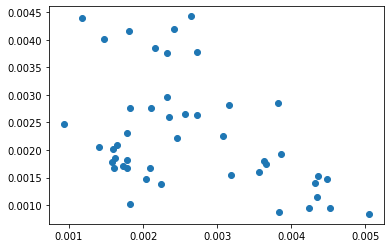

(-0.4297975741043116, 0.002873073203772225)

In [61]:
mean = np.mean
std = np.std

str1 = "Alpha"
str2 = "Delta"

func1 = mean
func2 = std

feature_1 = [func1(point.get(str1)) for point in data]
feature_2 = [func2(point.get(str2)) for point in data]

plotCorrelation(feature_1, feature_2)

In [62]:
possible_features = ['RawEEG', 'Alpha', 'Delta', 'Theta', 'Low Beta', 'High Beta', 'Gamma']
funcs = [mean]

for f_1 in possible_features:
    for f_2 in possible_features:
        for func1 in funcs:
            for func2 in funcs:
                feature_1 = [func1(point.get(f_1)) for point in data]
                feature_2 = [func2(point.get(f_2)) for point in data]

                print("Correlation between mean", f_1, "and mean", f_2, "\t", pearsonr(feature_1, feature_2)[0])

Correlation between mean RawEEG and mean RawEEG 	 1.0
Correlation between mean RawEEG and mean Alpha 	 0.12828533401078845
Correlation between mean RawEEG and mean Delta 	 -0.023962832831348
Correlation between mean RawEEG and mean Theta 	 -0.006206916483800446
Correlation between mean RawEEG and mean Low Beta 	 0.1447978209441165
Correlation between mean RawEEG and mean High Beta 	 0.13954997957372922
Correlation between mean RawEEG and mean Gamma 	 0.11696756607456028
Correlation between mean Alpha and mean RawEEG 	 0.12828533401078845
Correlation between mean Alpha and mean Alpha 	 1.0
Correlation between mean Alpha and mean Delta 	 0.4603999995549529
Correlation between mean Alpha and mean Theta 	 0.8749154774769515
Correlation between mean Alpha and mean Low Beta 	 0.9362291503258308
Correlation between mean Alpha and mean High Beta 	 0.3319581702512429
Correlation between mean Alpha and mean Gamma 	 -0.06961399834036619
Correlation between mean Delta and mean RawEEG 	 -0.02396283